In [121]:
import cv2, imutils
import matplotlib.pyplot as plt
import numpy as np

In [122]:
def implot(image):
    plt.imshow(image,cmap = 'gray')
    plt.show(image.any)
    
def threshold(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
    
    return thresh

def findCenter(image):
    # find contours in the thresholded image
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if imutils.is_cv2() else cnts[1]
    
    # loop over the contours
    for c in cnts:
        # compute the center of the contour
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    
    return cX, cY

def quadSplit(image, cX, cY):
    q1 = image[0:cY, 0:cX]
    q2 = image[0:cY, cX:]
    q3 = image[cY:, cX:]
    q4 = image[cY:, 0:cX]

    return [q1, q2, q3, q4]

#black - 0; white - 1
def quadClassify(quadrantList):
    
    quadStatus = np.zeros(len(quadrantList))
    
    for i, q in enumerate(quadrantList):
        avgIntensity, status = np.mean(q), 0
        if avgIntensity > 100:
            status = 1
        quadStatus[i]= status
    
    return quadStatus

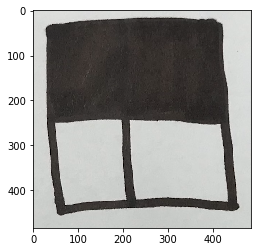

[0. 0. 1. 1.]


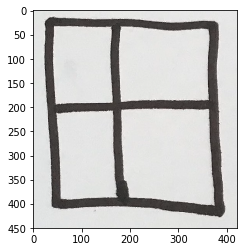

[1. 1. 1. 1.]


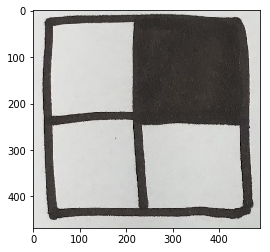

[1. 0. 1. 1.]


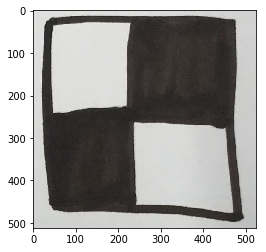

[1. 0. 1. 0.]


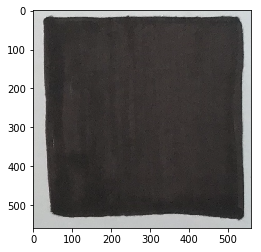

[0. 0. 0. 0.]


In [123]:
if __name__ == '__main__':
    
    for i in range(0,5):
        imagePath = 'images/face' + str(i) + '.jpg'
        image = cv2.imread(imagePath)
        im_thresh = threshold(image)
        implot(image)

        cX, cY = findCenter(im_thresh)
        quadList = quadSplit(im_thresh, cX, cY)

        quadStatus = quadClassify(quadList)
        print(quadStatus)

# Testing

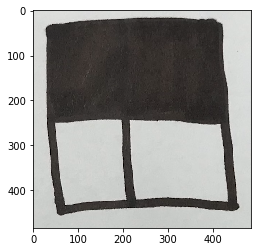

In [93]:
imagePath = 'images/face.jpg'
image = cv2.imread(imagePath)
implot(image)

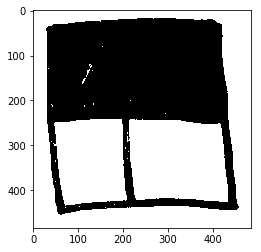

In [94]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
implot(thresh)

In [96]:
# find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]

In [102]:
# loop over the contours
for c in cnts:
    # compute the center of the contour
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    # draw the contour and center of the shape on the image
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    cv2.circle(image, (cX, cY), 7, (255, 255, 255), -1)
    cv2.putText(image, "center", (cX - 20, cY - 20),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

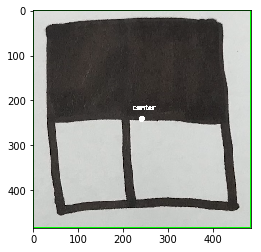

center:  241 241


In [103]:
implot(image)
print("center: ",cX, cY)

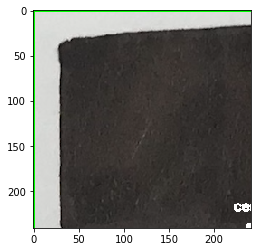

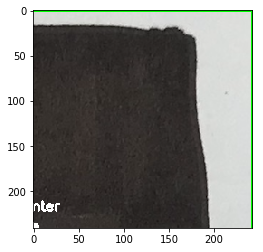

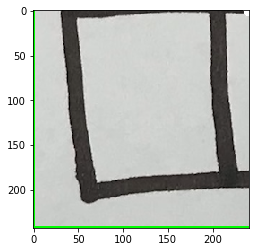

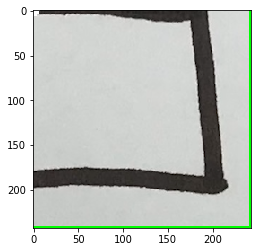

In [105]:
# split image into quadrants based on center

q1 = image[0:cY, 0:cX]
implot(q1)

q2 = image[0:cY, cX:]
implot(q2)

q3 = image[cY:, 0:cX]
implot(q3)

q4 = image[cY:, cX:]
implot(q4)

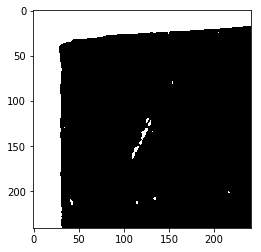

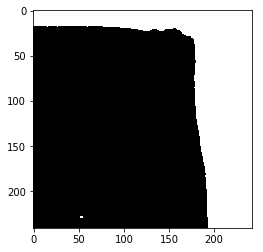

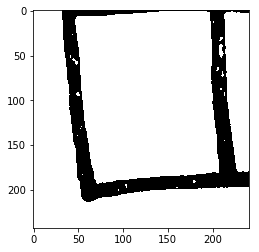

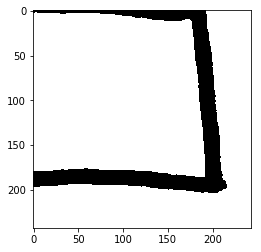

In [106]:
# split image into quadrants based on center

q1 = thresh[0:cY, 0:cX]
implot(q1)

q2 = thresh[0:cY, cX:]
implot(q2)

q3 = thresh[cY:, 0:cX]
implot(q3)

q4 = thresh[cY:, cX:]
implot(q4)

In [108]:
print(np.mean(q1))
print(np.mean(q2))
print(np.mean(q3))
print(np.mean(q4))

56.675935331691946
77.93734952102864
213.8955483837918
219.9212518416908


In [109]:
#black - 0; white - 1
def quadClassify(avgIntensity):
    
    status = 0
    if avgIntensity > 100:
        status = 1
    return status

In [112]:
print(quadClassify(np.mean(q1)))
print(quadClassify(np.mean(q2)))
print(quadClassify(np.mean(q3)))
print(quadClassify(np.mean(q4)))

0
0
1
1
